## 下載 ta-lib 套件

In [6]:
#Colab安裝Talib的解法
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2024-10-23 17:23:46--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-10-23 17:23:46--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-10-23 17:23:46--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Resolvi

## 與drive連線、read csv

In [7]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
file_path = '/content/drive/MyDrive/碩班進度/stockData/0050_2013-2024_adv.csv'
df = pd.read_csv(file_path)

#成交量(千股): Volume_Thousand_Shares
#成交筆數(筆): Number_of_Trades
#市值(百萬元): Market_Value_Million

column_mapping = {
    '證券代碼': 'Stock_Code',
    '年月日': 'Date',
    '開盤價(元)': 'Open',
    '最高價(元)': 'High',
    '最低價(元)': 'Low',
    '收盤價(元)': 'Close',
    '成交值(千元)': 'Turnover_Thousand',
    '成交量(千股)': 'Volume_Thousand_Shares',
    '成交筆數(筆)': 'Number_of_Trades',
    '市值(百萬元)': 'Market_Value_Million'
}

# 重命名欄位
df = df.rename(columns=column_mapping)

df['Date']=pd.to_datetime(df['Date'])
df['Open']=df['Open'].astype(float)
df['High']=df['High'].astype(float)
df['Low']=df['Low'].astype(float)
df['Close']=df['Close'].astype(float)
df=df.set_index('Date')
df=df.drop(columns=['Stock_Code'])

# 將資料按照日期升序排序（最遠的日期開始）
df = df.sort_index(ascending=True)

df.head()

,Open,High,Low,Close,Volume_Thousand_Shares,Turnover_Thousand,Number_of_Trades,Market_Value_Million
Date,,,,,,,,
2013-10-14,40.7062,40.7062,40.3925,40.4274,"6,623","385,079","1,463","86,043"
2013-10-15,40.7411,40.8456,40.6365,40.7759,"8,042","470,229","2,213","85,059"
2013-10-16,40.7411,40.8456,40.6016,40.6016,"7,029","410,205","1,844","84,696"
2013-10-17,40.8805,41.0199,40.7411,40.8108,"5,062","296,652","1,332","84,605"
2013-10-18,40.8805,41.1941,40.8805,41.1593,"14,818","872,614","3,248","83,261"


## Function：計算技術指標

In [9]:
import talib
import numpy as np

# 定義計算技術指標的函數
def add_technical_indicators(df):
    # 確保 Volume 欄位為浮點數
    df['Volume_Thousand_Shares'] = pd.to_numeric(df['Volume_Thousand_Shares'].astype(str).str.replace(',', '', regex=True), errors='coerce')

    # 計算 K 值和 D 值
    df['K'], df['D'] = talib.STOCH(df['High'], df['Low'], df['Close'], fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

    # 計算 OSC (K - D)
    # df['OSC'] = df['K'] - df['D']

    # 計算 MACD, DIF, MACD histogram
    df['DIF'], df['MACD'], df['MACD_hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

    # 計算 RSI (相對強弱指標)
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

    # 計算 Bollinger Bands (布林帶)
    df['Upper_Band'], df['Middle_Band'], df['Lower_Band'] = talib.BBANDS(df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

    # 計算 SMA (簡單移動平均線)
    df['SMA'] = talib.SMA(df['Close'], timeperiod=30)

    # 計算 EMA (指數移動平均線)
    df['EMA'] = talib.EMA(df['Close'], timeperiod=30)

    # 計算 OBV (累積能量線)
    # df['OBV'] = talib.OBV(df['Close'], df['Volume_Thousand_Shares'])

    return df

# 使用函數對 DataFrame 添加技術指標
df = add_technical_indicators(df)
df.head()


,Open,High,Low,Close,Volume_Thousand_Shares,Turnover_Thousand,Number_of_Trades,Market_Value_Million,K,D,DIF,MACD,MACD_hist,RSI,Upper_Band,Middle_Band,Lower_Band,SMA,EMA
Date,,,,,,,,,,,,,,,,,,,
2013-10-14,40.7062,40.7062,40.3925,40.4274,6623,"385,079","1,463","86,043",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-15,40.7411,40.8456,40.6365,40.7759,8042,"470,229","2,213","85,059",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-16,40.7411,40.8456,40.6016,40.6016,7029,"410,205","1,844","84,696",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-17,40.8805,41.0199,40.7411,40.8108,5062,"296,652","1,332","84,605",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-18,40.8805,41.1941,40.8805,41.1593,14818,"872,614","3,248","83,261",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# 查找每一列中是否包含 NaN 值
nan_info = df.isna().sum()
print(nan_info)

Open                      0
High                      0
Low                       0
Close                     0
Volume_Thousand_Shares    0
Turnover_Thousand         0
Number_of_Trades          0
Market_Value_Million      0
K                         0
D                         0
DIF                       0
MACD                      0
MACD_hist                 0
RSI                       0
Upper_Band                0
Middle_Band               0
Lower_Band                0
SMA                       0
EMA                       0
dtype: int64


In [27]:
df = df.dropna()

## 將資料分成train_df、test_df

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split

# 將資料分為 80% 訓練集和 20% 測試集，保持時間順序
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)

# 檢查切分後的資料形狀
print(f"Training data shape: {train_df.shape}")
print(f"Testing data shape: {test_df.shape}")

Training data shape: (2124, 17)
Testing data shape: (531, 17)


In [ ]:
print(f"Train start: {train_df.index.min()}, Train end: {train_df.index.max()}")
print(f"Test start: {test_df.index.min()}, Test end: {test_df.index.max()}")

Train start: 2013-11-28 00:00:00, Train end: 2022-08-02 00:00:00
Test start: 2022-08-03 00:00:00, Test end: 2024-10-11 00:00:00


In [ ]:
print(f"Training data shape after dropping NaN: {train_df.shape}")

Training data shape after dropping NaN: (2124, 17)


In [10]:
train_df=df

## Function：計算收益及顯示買賣點

In [11]:
import matplotlib.pyplot as plt

# 定義繪圖函數
def plot_buy_sell_points_with_profit_and_connections(df, start_date=None, end_date=None):
    if start_date and end_date:
        df_window = df.loc[start_date:end_date]
    else:
        df_window = df

    # 繪製收盤價折線圖
    plt.figure(figsize=(14, 7))
    plt.plot(df_window.index, df_window['Close'], label='Close Price', color='blue')

    # 獲取標記為買點和賣點的索引
    buy_points = df_window[df_window['Label'] == 0].index
    sell_points = df_window[df_window['Label'] == 2].index

    # 標註買點和賣點
    plt.scatter(buy_points, df_window.loc[buy_points, 'Close'], color='green', label='Buy Point (0)', marker='o')
    plt.scatter(sell_points, df_window.loc[sell_points, 'Close'], color='red', label='Sell Point (2)', marker='o')

    # 計算總收益並繪製連接線
    total_profit = 0
    positions = []

    for index, row in df_window.iterrows():
        if row['Label'] == 0:
            positions.append((index, row['Close']))
        elif row['Label'] == 2 and positions:
            buy_index, buy_price = positions.pop(0)
            sell_price = row['Close']
            profit = sell_price - buy_price
            total_profit += profit

            plt.plot([buy_index, index], [buy_price, sell_price], color='gray', linestyle='--', linewidth=1)
            mid_index = buy_index + (index - buy_index) / 2
            mid_price = buy_price + (sell_price - buy_price) / 2
            profit_label = f'{profit:.2f}'
            plt.text(mid_index, mid_price, profit_label, color='black', fontsize=9, ha='center')

    plt.title(f'Close Prices with Buy (0) and Sell (2) Points\n(Period: {start_date} to {end_date})\nTotal Profit: {total_profit:.2f}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()

    plt.show()
    print(f'Total profit from {start_date} to {end_date} is: {total_profit:.2f}')


## 將training data 以「極值」的方式選擇買賣點Label

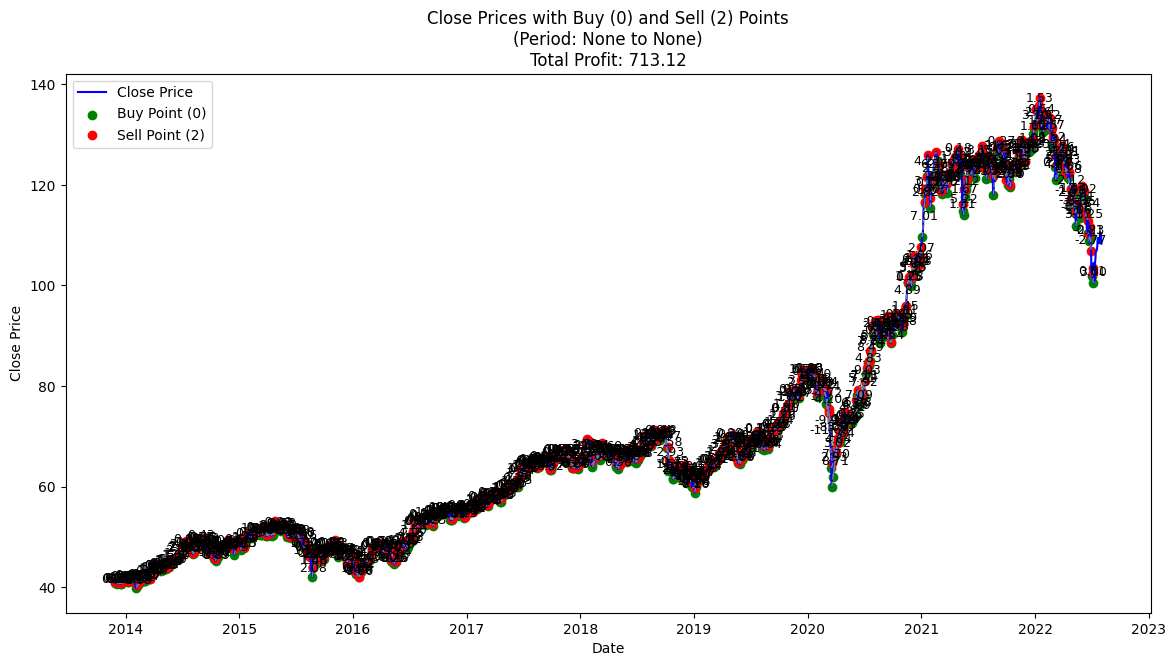

Total profit from None to None is: 713.12


In [ ]:
from scipy.signal import argrelextrema
# 定義標註函數，以局部極值尋找最適合的買入和賣出點
def label_daily_data_with_extrema(df, window_size=54, sub_window_size=6):
    labels = [1] * len(df)  # 初始化所有標籤為 1

    for i in range(0, len(df) - window_size + 1, window_size):
        group = df.iloc[i:i + window_size]

        for j in range(0, window_size, sub_window_size):
            sub_group = group.iloc[j:j + sub_window_size]

            if len(sub_group) < sub_window_size:
                continue

            # 使用局部極小值和極大值來標註買入和賣出點
            min_index = sub_group['Close'].iloc[argrelextrema(sub_group['Close'].values, np.less_equal, order=1)].index
            max_index = sub_group['Close'].iloc[argrelextrema(sub_group['Close'].values, np.greater_equal, order=1)].index

            for idx in min_index:
                labels[df.index.get_loc(idx)] = 0  # 標記買入點為 0
            for idx in max_index:
                labels[df.index.get_loc(idx)] = 2  # 標記賣出點為 2

    df['Label'] = labels
    return df

# 使用標註函數對訓練資料進行標註
train_df = label_daily_data_with_extrema(train_df)
train_df.head()
plot_buy_sell_points_with_profit_and_connections(train_df, start_date=None, end_date=None)

## 將training data以「格蘭碧八大法則」的方式選擇買賣點Label
https://www.oanda.com/bvi-ft/lab-education/technical_analysis/moving_average-granvilles_law/

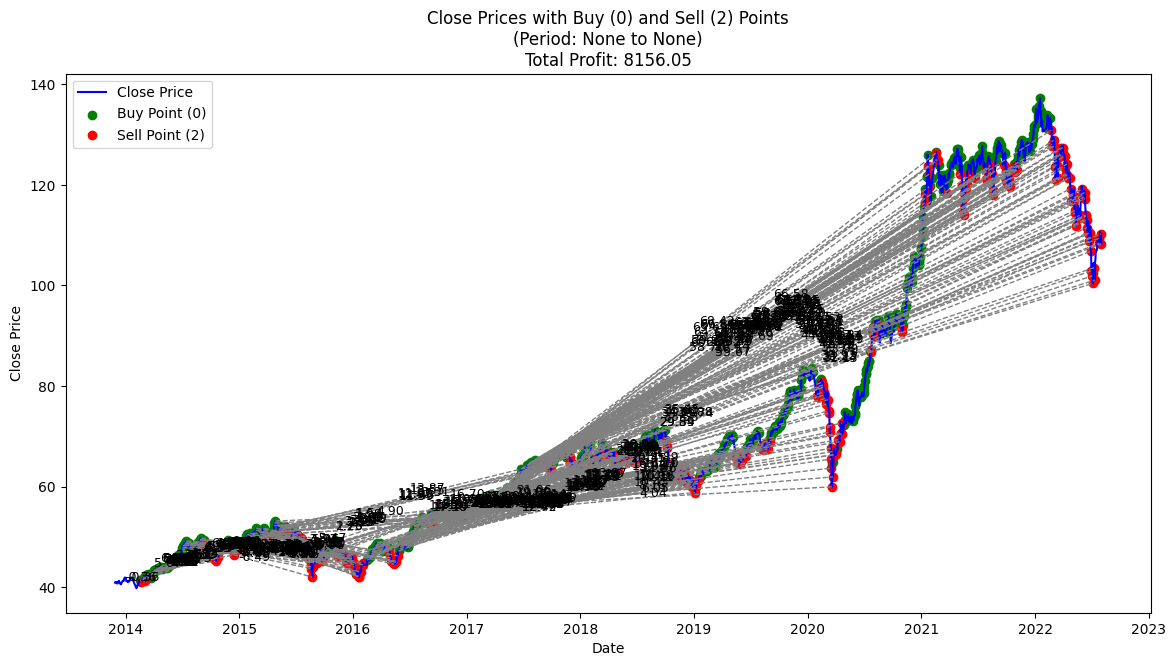

Total profit from None to None is: 8156.05


In [ ]:
# 定義標註函數，根據格蘭碧八大法則進行買賣點標記
def label_granville_rules(df):
    # 計算移動平均線（SMA）
    df['SMA'] = talib.SMA(df['Close'], timeperiod=50)
    labels = [1] * len(df)  # 初始化所有標籤為 1

    for i in range(1, len(df)):
        if pd.isna(df['SMA'].iloc[i]):
            continue

        # 格蘭碧法則 - 買入信號
        # 1. 突破
        if df['SMA'].iloc[i-1] >= df['SMA'].iloc[i] and df['SMA'].iloc[i] < df['Close'].iloc[i] and df['Close'].iloc[i-1] < df['SMA'].iloc[i]:
            labels[i] = 0  # 買入點標記為 0
        # 2. 假跌破
        elif df['Close'].iloc[i-1] < df['SMA'].iloc[i-1] and df['Close'].iloc[i] > df['SMA'].iloc[i] and df['SMA'].iloc[i] > df['SMA'].iloc[i-1]:
            labels[i] = 0  # 買入點標記為 0
        # 3. 支撐
        elif df['Close'].iloc[i] > df['SMA'].iloc[i] and df['Close'].iloc[i-1] > df['SMA'].iloc[i-1] and df['Close'].iloc[i] > df['Close'].iloc[i-1]:
            labels[i] = 0  # 買入點標記為 0
        # 4. 抄底
        elif df['Close'].iloc[i] < df['SMA'].iloc[i] * 0.9 and df['Close'].iloc[i] > df['Close'].iloc[i-1]:
            labels[i] = 0  # 買入點標記為 0

        # 格蘭碧法則 - 賣出信號
        # 5. 跌破
        elif df['SMA'].iloc[i-1] <= df['SMA'].iloc[i] and df['SMA'].iloc[i] > df['Close'].iloc[i] and df['Close'].iloc[i-1] > df['SMA'].iloc[i]:
            labels[i] = 2  # 賣出點標記為 2
        # 6. 假突破
        elif df['Close'].iloc[i-1] > df['SMA'].iloc[i-1] and df['Close'].iloc[i] < df['SMA'].iloc[i] and df['SMA'].iloc[i] < df['SMA'].iloc[i-1]:
            labels[i] = 2  # 賣出點標記為 2
        # 7. 反壓
        elif df['Close'].iloc[i] < df['SMA'].iloc[i] and df['Close'].iloc[i-1] < df['SMA'].iloc[i-1] and df['Close'].iloc[i] < df['Close'].iloc[i-1]:
            labels[i] = 2  # 賣出點標記為 2
        # 8. 反轉
        elif df['Close'].iloc[i] > df['SMA'].iloc[i] * 1.1 and df['Close'].iloc[i] < df['Close'].iloc[i-1]:
            labels[i] = 2  # 賣出點標記為 2

    df['Label'] = labels
    return df

# 使用標註函數對訓練資料進行標註
train_df = label_granville_rules(train_df)
train_df.head()
plot_buy_sell_points_with_profit_and_connections(train_df, start_date=None, end_date=None)

## 將training data 以「原作者」的方式選擇買賣點Label

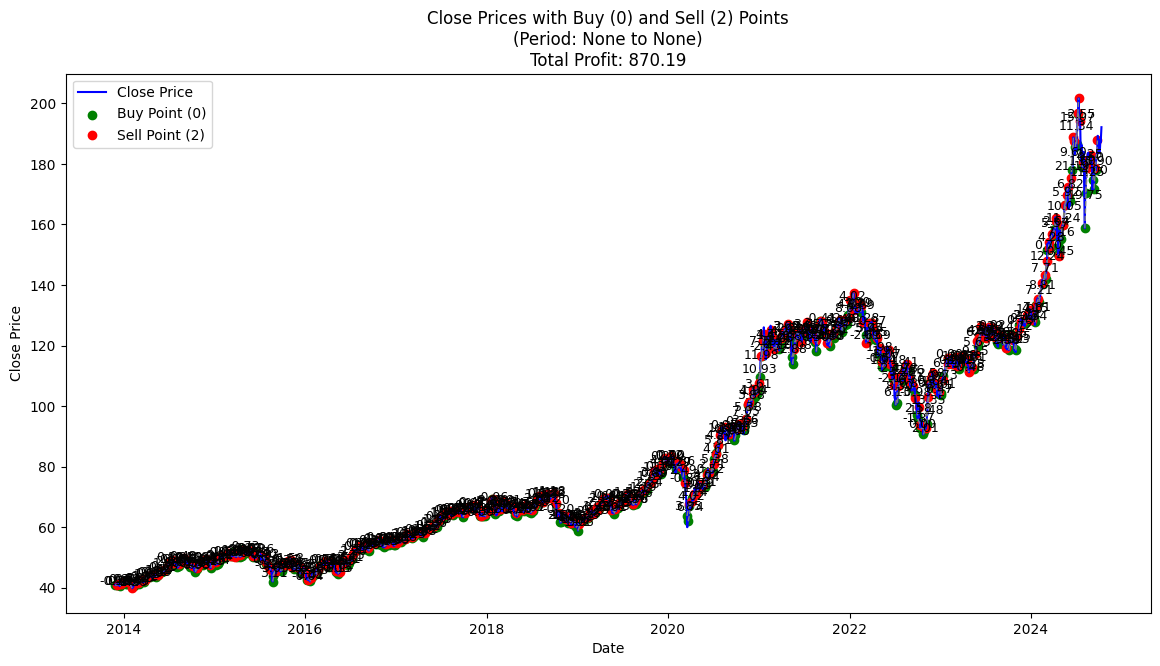

Total profit from None to None is: 870.19


In [80]:
!pip install TA-Lib
import talib
import numpy as np
import pandas as pd


# 定義標註函數
def label_daily_data(df, window_size=54, sub_window_size=6):
    # Calculate DIF if it doesn't exist
    if 'DIF' not in df.columns:
        df['DIF'] = talib.MACD(df['Close'])[0]  # Assuming you want to use MACD for DIF

    labels = [1] * len(df)  # 初始化所有標籤為 1

    for i in range(0, len(df) - window_size + 1, window_size):
        group = df.iloc[i:i + window_size]

        for j in range(0, window_size, sub_window_size):
            sub_group = group.iloc[j:j + sub_window_size]

            if len(sub_group) < sub_window_size:
                continue

            if sub_group['DIF'].isnull().all():
                continue

            min_index = sub_group['DIF'].idxmin()
            max_index = sub_group['DIF'].idxmax()

            if min_index == max_index:
                continue

            labels[df.index.get_loc(min_index)] = 0
            labels[df.index.get_loc(max_index)] = 2

    df['Label'] = labels
    return df

# 使用標註函數對訓練資料進行標註
train_df = label_daily_data(train_df)
train_df.head()
plot_buy_sell_points_with_profit_and_connections(train_df, start_date=None, end_date=None)

## 作者版本（更正後）

<ipython-input-12-a28df9a2ea43>:27: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  min_index = sub_group[['DIF', 'K']].idxmin().dropna().unique()
<ipython-input-12-a28df9a2ea43>:28: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_index = sub_group[['DIF', 'K']].idxmax().dropna().unique()
<ipython-input-12-a28df9a2ea43>:27: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  min_index = sub_group[['DIF', 'K']].idxmin().dropna().unique()
<ipython-input-12-a28df9a2ea43>:28: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_index = sub_group[['DIF

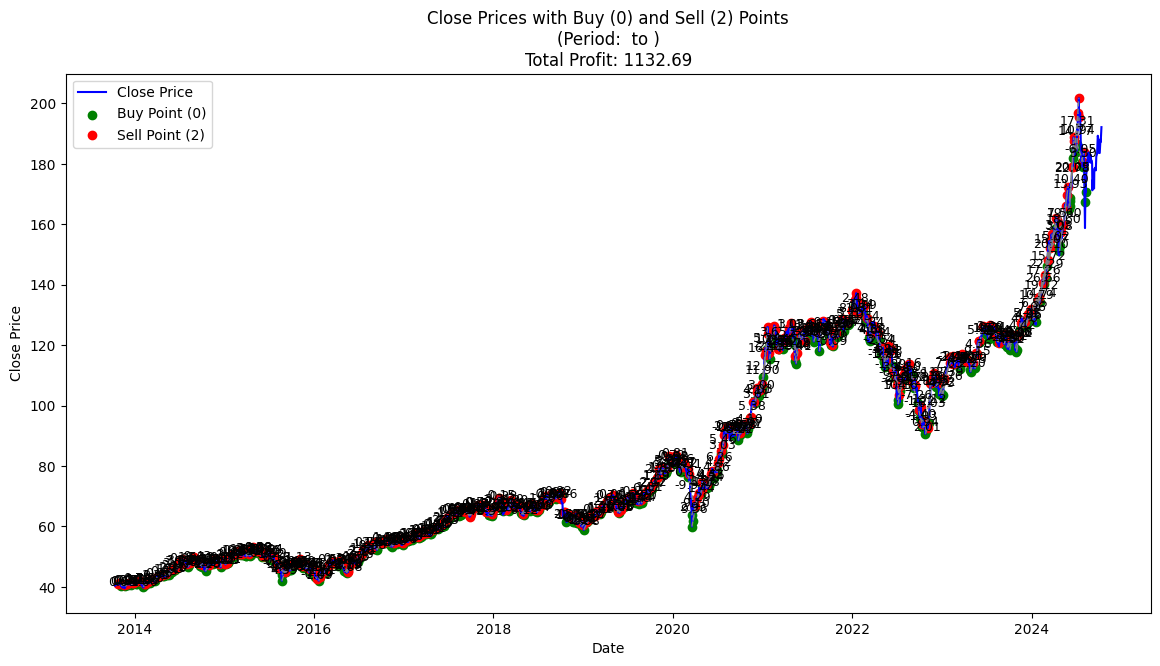

Total profit from  to  is: 1132.69


In [12]:
import talib
import pandas as pd

# 定義標註函數，基於 DIF 和 K 值進行標註
def label_trading_data(df, window_size=54, sub_window_size=9):
    # 計算 DIF（MACD 快線）
    if 'DIF' not in df.columns:
        macd, signal, hist = talib.MACD(df['Close'])
        df['DIF'] = macd

    # 計算 K 值（RSI）
    if 'K' not in df.columns:
        df['K'] = talib.RSI(df['Close'], timeperiod=14)

    labels = [1] * len(df)  # 初始化所有標籤為 1（持有信號）

    for i in range(0, len(df) - window_size + 1, window_size):
        group = df.iloc[i:i + window_size]

        for j in range(0, window_size, sub_window_size):
            sub_group = group.iloc[j:j + sub_window_size]

            if len(sub_group) < sub_window_size:
                continue

            # 找出 DIF 和 K 值的最小值和最大值索引
            min_index = sub_group[['DIF', 'K']].idxmin().dropna().unique()
            max_index = sub_group[['DIF', 'K']].idxmax().dropna().unique()

            # 標記買入和賣出信號
            for index in min_index:
                labels[df.index.get_loc(index)] = 0  # 標記為買入信號
            for index in max_index:
                labels[df.index.get_loc(index)] = 2  # 標記為賣出信號

    df['Label'] = labels
    return df


train_df = label_trading_data(train_df)

train_df.head()
plot_buy_sell_points_with_profit_and_connections(train_df, start_date='', end_date='')


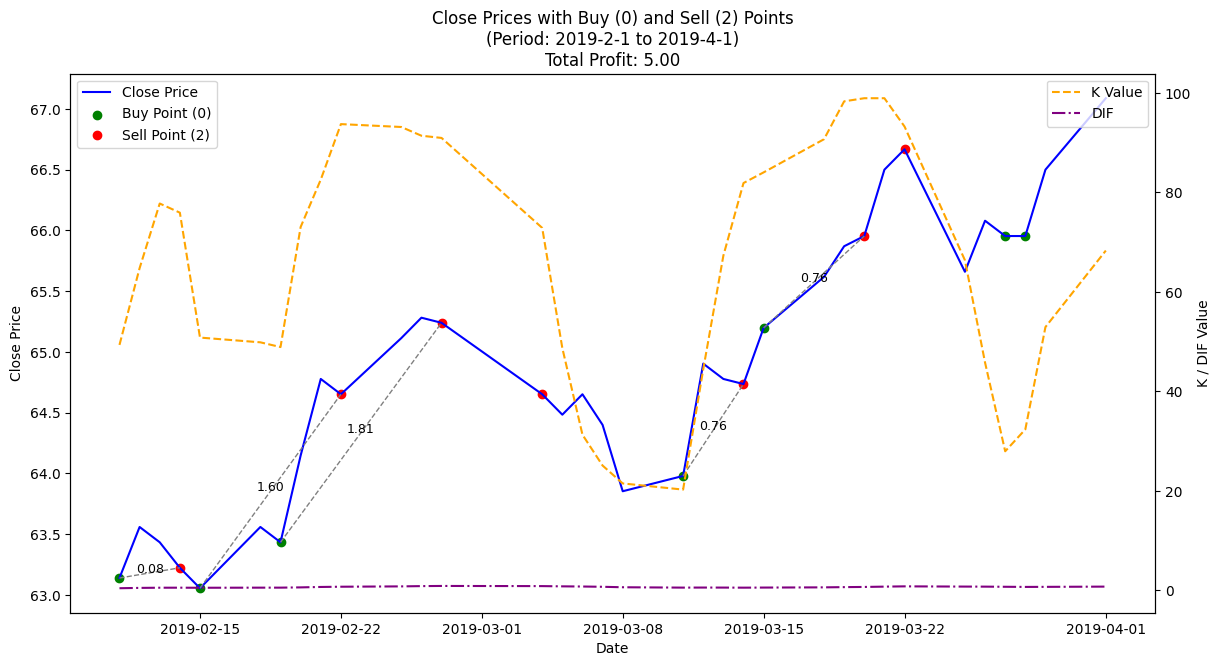

Total profit from 2019-2-1 to 2019-4-1 is: 5.00


In [86]:
import matplotlib.pyplot as plt

# 定義繪圖函數
def plot_buy_sell_points_with_profit_and_connections(df, start_date=None, end_date=None):
    if start_date and end_date:
        df_window = df.loc[start_date:end_date]
    else:
        df_window = df

    # 建立主圖
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # 繪製收盤價折線圖
    ax1.plot(df_window.index, df_window['Close'], label='Close Price', color='blue')

    # 獲取標記為買點和賣點的索引
    buy_points = df_window[df_window['Label'] == 0].index
    sell_points = df_window[df_window['Label'] == 2].index

    # 標註買點和賣點
    ax1.scatter(buy_points, df_window.loc[buy_points, 'Close'], color='green', label='Buy Point (0)', marker='o')
    ax1.scatter(sell_points, df_window.loc[sell_points, 'Close'], color='red', label='Sell Point (2)', marker='o')

    # 計算總收益並繪製連接線
    total_profit = 0
    positions = []

    for index, row in df_window.iterrows():
        if row['Label'] == 0:
            positions.append((index, row['Close']))
        elif row['Label'] == 2 and positions:
            buy_index, buy_price = positions.pop(0)
            sell_price = row['Close']
            profit = sell_price - buy_price
            total_profit += profit

            ax1.plot([buy_index, index], [buy_price, sell_price], color='gray', linestyle='--', linewidth=1)
            mid_index = buy_index + (index - buy_index) / 2
            mid_price = buy_price + (sell_price - buy_price) / 2
            profit_label = f'{profit:.2f}'
            ax1.text(mid_index, mid_price, profit_label, color='black', fontsize=9, ha='center')

    # 設置主圖標籤和圖例
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Close Price')
    ax1.legend(loc='upper left')

    # 第二個 Y 軸，顯示 K 值和 DIF 值
    ax2 = ax1.twinx()
    ax2.plot(df_window.index, df_window['K'], label='K Value', color='orange', linestyle='--', linewidth=1.5)
    ax2.plot(df_window.index, df_window['DIF'], label='DIF', color='purple', linestyle='-.', linewidth=1.5)
    ax2.set_ylabel('K / DIF Value')
    ax2.legend(loc='upper right')

    # 繪圖標題
    plt.title(f'Close Prices with Buy (0) and Sell (2) Points\n(Period: {start_date} to {end_date})\nTotal Profit: {total_profit:.2f}')

    # 顯示圖形
    plt.show()

    # 輸出總收益
    print(f'Total profit from {start_date} to {end_date} is: {total_profit:.2f}')

# 使用這個函數
plot_buy_sell_points_with_profit_and_connections(train_df, start_date='2019-2-1', end_date='2019-4-1')


## 查看Label平衡與否

Label distribution in the dataset:
Label 0: 468 samples
Label 1: 1693 samples
Label 2: 527 samples


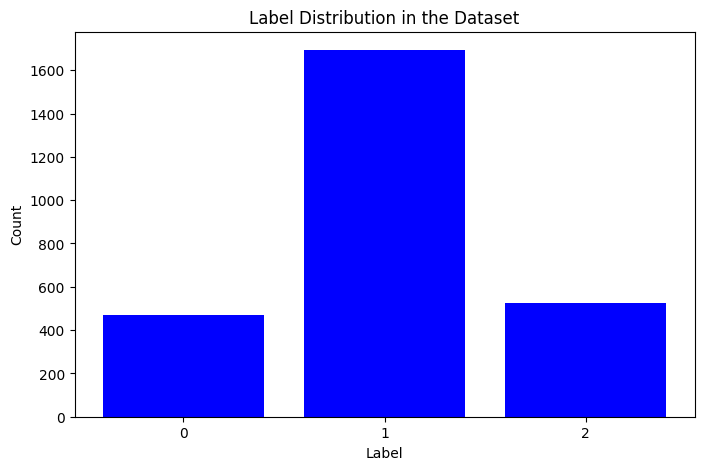

In [13]:
# Assuming y is the label column from train_df
y = train_df['Label']

# Calculate label distribution
unique, counts = np.unique(y, return_counts=True)
label_distribution = dict(zip(unique, counts))

# Print label distribution
print("Label distribution in the dataset:")
for label, count in label_distribution.items():
    print(f"Label {label}: {count} samples")

# Visualize label distribution
plt.figure(figsize=(8, 5))
plt.bar(label_distribution.keys(), label_distribution.values(), color='blue')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution in the Dataset')
plt.xticks(list(label_distribution.keys()))
plt.show()


# Deep Learning Function

## Function：confusion_matrix

In [14]:
## Function：confusion_matrix
def confusion_matrix(y_true, y_pred):
  # Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

  # Classification Report
  print("Classification Report:")
  print(classification_report(y_test, y_pred))

## Function：accuracy_plot

In [15]:
def accuracy_plot(history):
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend()

    plt.show()

## Function：plot_buy_sell_points_with_profit

In [16]:
# Plot Buy/Sell Points and Calculate Total Profit
def plot_buy_sell_points_with_profit(df, y_true, y_pred, start_date=None, end_date=None,window_size=9):
    if start_date and end_date:
        df = df.loc[start_date:end_date]
        # Get the integer positions of the start and end dates in the original y_true array
        start_index = df.index[0]
        end_index = df.index[-1]

        # Find the corresponding indices in y_true/y_pred (assuming they align with the original df)
        start_pos = df.index.get_loc(start_index)
        end_pos = df.index.get_loc(end_index) + 1 # +1 to include the end index

        y_true = y_true[start_pos:end_pos] # Use integer positions for slicing
        y_pred = y_pred[start_pos:end_pos] # Use integer positions for slicing

    else:
        df = df.iloc[window_size:len(y_true) + window_size] # Access window_size

    df['True_Label'] = y_true
    df['Predicted_Label'] = y_pred

    buy_points = df[df['Predicted_Label'] == 0].index
    sell_points = df[df['Predicted_Label'] == 2].index

    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.scatter(buy_points, df.loc[buy_points, 'Close'], color='green', label='Buy Point', marker='o')
    plt.scatter(sell_points, df.loc[sell_points, 'Close'], color='red', label='Sell Point', marker='o')

    total_profit = 0
    positions = []
    for index, row in df.iterrows():
        if row['Predicted_Label'] == 0:
            positions.append((index, row['Close']))
        elif row['Predicted_Label'] == 2 and positions:
            buy_index, buy_price = positions.pop(0)
            sell_price = row['Close']
            profit = sell_price - buy_price
            total_profit += profit
            plt.plot([buy_index, index], [buy_price, sell_price], color='gray', linestyle='--', linewidth=1)

    plt.title(f'Close Prices with Buy and Sell Points\nTotal Profit: {total_profit:.2f}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

## Function：CNN_model

In [17]:
from tensorflow.keras.layers import LSTM, Dropout, Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # Import StandardScaler from sklearn.preprocessing
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix # Import confusion_matrix with an alias
import seaborn as sns
from tensorflow.keras.layers import LSTM, Dropout, Dense, Conv1D, MaxPooling1D, Flatten # Import Conv1D, MaxPooling1D and Flatten

def CNN_model(train_df,features=['Open', 'High', 'Low', 'Close', 'Volume_Thousand_Shares', 'Number_of_Trades', 'Market_Value_Million']):
  X = train_df[features]
  y = train_df['Label']

  # Replace NaN and Inf values
  X.replace([np.inf, -np.inf], np.nan, inplace=True)

  # Convert columns with commas to numeric
  for col in features:  # Iterate through relevant columns
      # Check if the column has object (string) dtype before applying str methods
      if X[col].dtype == object:
          X[col] = X[col].str.replace(',', '', regex=False).astype(float)  # Remove commas and convert to float
      else:
          # If not object dtype, assume it's already numeric or can be directly converted
          X[col] = X[col].astype(float)

  X.fillna(X.median(), inplace=True) # Now fill NaN with median after conversion

  # Convert features to numpy array
  X = X.values
  y = y.values

  # Handle imbalance using RandomOverSampler
  ros = RandomOverSampler(random_state=42)
  X_resampled, y_resampled = ros.fit_resample(X, y)

  # Standardize the input data
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X_resampled)

  # Step 4: Create Sequences for Time Series
  window_size = 9
  num_features = len(features)

  def create_sequences(data, labels, window_size):
      X_seq, y_seq = [], []
      for i in range(len(data) - window_size):
          X_seq.append(data[i:i + window_size])
          y_seq.append(labels[i + window_size])
      return np.array(X_seq), np.array(y_seq)

  X_seq, y_seq = create_sequences(X_scaled, y_resampled, window_size)

  # Step 5: Split Training and Testing Data
  X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

  # Step 6: Build and Train the CNN Model
  model = Sequential()
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, num_features)))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dropout(0.2))
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(3, activation='softmax'))  # 3 classes for labels 0, 1, 2


  # Compile the model
  optimizer = Adam(learning_rate=0.0001, clipnorm=1.0)
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  # Train the model with Early Stopping
  early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
  history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

  # Step 7: Evaluate the Model
  test_loss, test_acc = model.evaluate(X_test, y_test)
  print(f"Test accuracy: {test_acc:.2f}")

  # Predict on Test Set
  y_pred_prob = model.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  # Calculate Mean Squared Error
  mse = mean_squared_error(y_test, y_pred)
  print(f"Test MSE: {mse:.2f}")


  # Confusion Matrix
  cm = sklearn_confusion_matrix(y_test, y_pred) # Call the correct confusion_matrix
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

  accuracy_plot(history)

  # Buy and Sell plot
  plot_buy_sell_points_with_profit(train_df, y_test, y_pred)

## Function：LSTM_model

In [18]:
from tensorflow.keras.layers import LSTM, Dropout, Dense
import matplotlib.pyplot as plt

def LSTM_model(train_df,features=['Open', 'High', 'Low', 'Close', 'Volume_Thousand_Shares', 'Number_of_Trades', 'Market_Value_Million']):
  # Step 3: Split Data and Handle Imbalance
  features = ['Open', 'High', 'Low', 'Close', 'Volume_Thousand_Shares', 'Number_of_Trades', 'Market_Value_Million']
  X = train_df[features]
  y = train_df['Label']

  # Replace NaN and Inf values
  X.replace([np.inf, -np.inf], np.nan, inplace=True)

  # Convert columns with commas to numeric
  for col in features:
      # Check if the column has object (string) dtype before applying str methods
      if X[col].dtype == object:
          X[col] = X[col].str.replace(',', '', regex=False).astype(float)  # Remove commas and convert to float
      else:
          # If not object dtype, assume it's already numeric or can be directly converted
          X[col] = X[col].astype(float)  # Convert to numeric if possible

  X.fillna(X.median(), inplace=True) # Now fill NaN with median after conversion

  # Convert features to numpy array
  X = X.values
  y = y.values

  # Handle imbalance using RandomOverSampler
  ros = RandomOverSampler(random_state=42)
  X_resampled, y_resampled = ros.fit_resample(X, y)

  # Standardize the input data
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X_resampled)

  # Step 4: Create Sequences for Time Series
  window_size = 9
  num_features = len(features)

  def create_sequences(data, labels, window_size):
      X_seq, y_seq = [], []
      for i in range(len(data) - window_size):
          X_seq.append(data[i:i + window_size])
          y_seq.append(labels[i + window_size])
      return np.array(X_seq), np.array(y_seq)

  X_seq, y_seq = create_sequences(X_scaled, y_resampled, window_size)

  # Step 5: Split Training and Testing Data
  X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

  # Step 6: Build and Train the LSTM Model
  model = Sequential()
  model.add(LSTM(64, activation='relu', input_shape=(window_size, num_features), return_sequences=True))
  model.add(Dropout(0.2))
  model.add(LSTM(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(3, activation='softmax'))  # 3 classes for labels 0, 1, 2

  # Compile the model
  optimizer = Adam(learning_rate=0.0001, clipnorm=1.0)
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  # Train the model with Early Stopping
  early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
  history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

  # Step 7: Evaluate the Model
  test_loss, test_acc = model.evaluate(X_test, y_test)
  print(f"Test accuracy: {test_acc:.2f}")

  # Predict on Test Set
  y_pred_prob = model.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  # Calculate Mean Squared Error
  mse = mean_squared_error(y_test, y_pred)
  print(f"Test MSE: {mse:.2f}")


  # Confusion Matrix
  cm = sklearn_confusion_matrix(y_test, y_pred) # Call the correct confusion_matrix
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

  accuracy_plot(history)

  # Buy and Sell plot
  plot_buy_sell_points_with_profit(train_df, y_test, y_pred)

#Train data (CNN、LSTM、CNN-LSTM)

## CNN less features

Epoch 1/100


<ipython-input-59-5f618cc351ed>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-59-5f618cc351ed>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(float)
<ipython-input-59-5f618cc351ed>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3420 - loss: 1.1391 - val_accuracy: 0.4960 - val_loss: 1.0009
Epoch 2/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4683 - loss: 1.0029 - val_accuracy: 0.5797 - val_loss: 0.9304
Epoch 3/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5405 - loss: 0.9368 - val_accuracy: 0.6066 - val_loss: 0.8922
Epoch 4/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5685 - loss: 0.8931 - val_accuracy: 0.6145 - val_loss: 0.8693
Epoch 5/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6030 - loss: 0.8573 - val_accuracy: 0.6215 - val_loss: 0.8542
Epoch 6/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5943 - loss: 0.8563 - val_accuracy: 0.6315 - val_loss: 0.8448
Epoch 7/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6044 - loss: 0.8417 - val_accuracy: 0.6305 - val_loss: 0.8379
Epoch 8/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6088 - loss: 0.8320 - val_accuracy: 0.6305

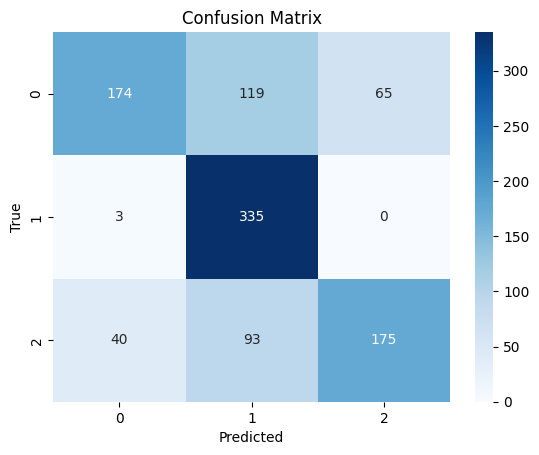

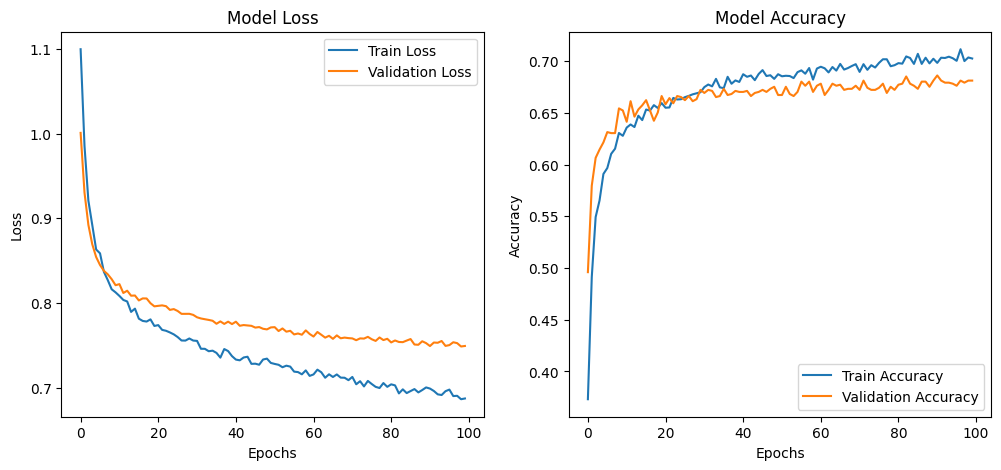

<ipython-input-22-51828c325972>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['True_Label'] = y_true
<ipython-input-22-51828c325972>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Label'] = y_pred


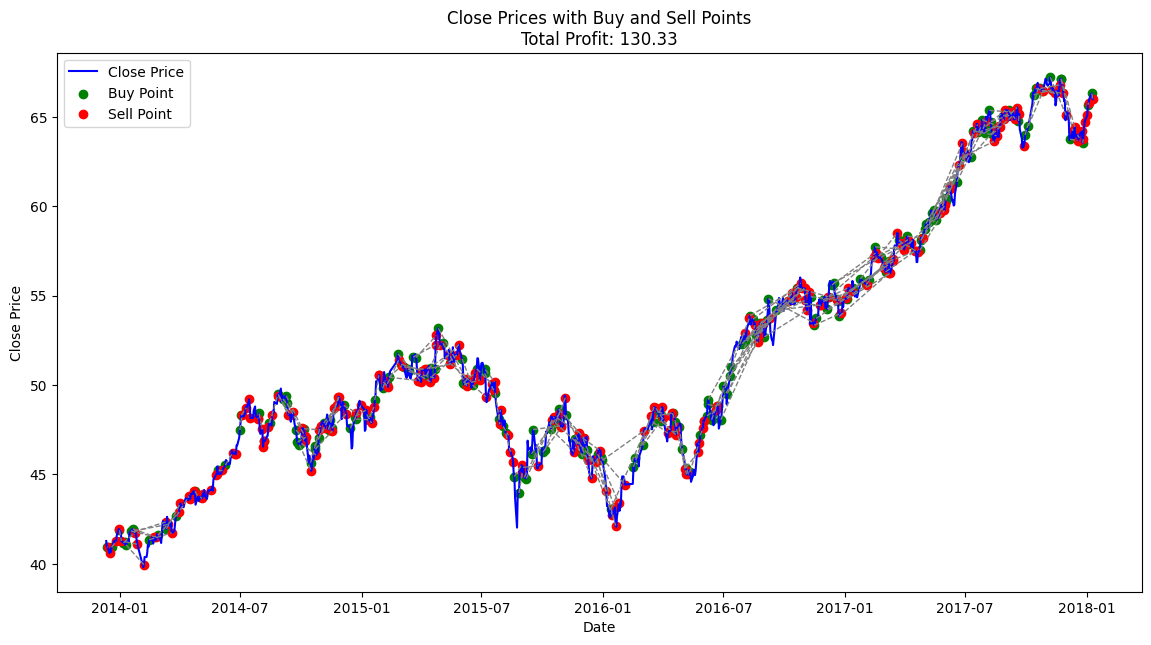

In [60]:
CNN_model(train_df,['Open', 'High', 'Low', 'Close', 'Volume_Thousand_Shares', 'Number_of_Trades', 'Market_Value_Million'])

## CNN more features

Epoch 1/100


<ipython-input-59-5f618cc351ed>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-59-5f618cc351ed>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(float)
<ipython-input-59-5f618cc351ed>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3735 - loss: 1.1406 - val_accuracy: 0.5817 - val_loss: 0.9156
Epoch 2/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5493 - loss: 0.9364 - val_accuracy: 0.6414 - val_loss: 0.8421
Epoch 3/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6135 - loss: 0.8598 - val_accuracy: 0.6633 - val_loss: 0.8107
Epoch 4/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6269 - loss: 0.8216 - val_accuracy: 0.6902 - val_loss: 0.7885
Epoch 5/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6572 - loss: 0.8043 - val_accuracy: 0.7052 - val_loss: 0.7661
Epoch 6/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6692 - loss: 0.7711 - val_accuracy: 0.7161 - val_loss: 0.7554
Epoch 7/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6858 - loss: 0.7591 - val_accuracy: 0.7251 - val_loss: 0.7381
Epoch 8/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7051 - loss: 0.7216 - val_accuracy: 0.7241

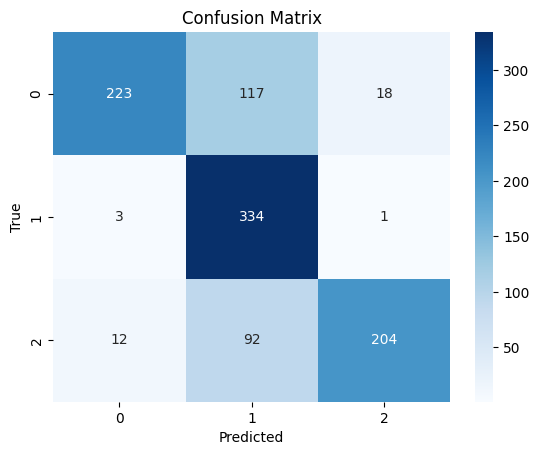

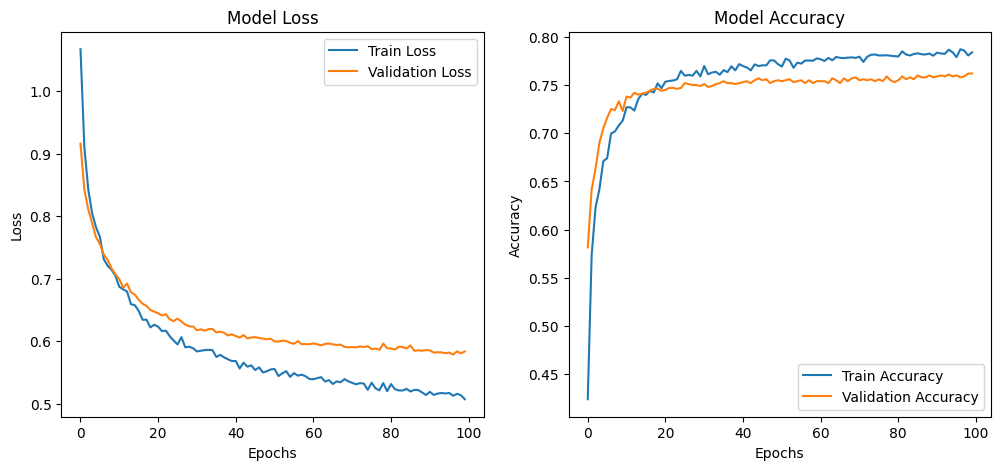

<ipython-input-22-51828c325972>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['True_Label'] = y_true
<ipython-input-22-51828c325972>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Label'] = y_pred


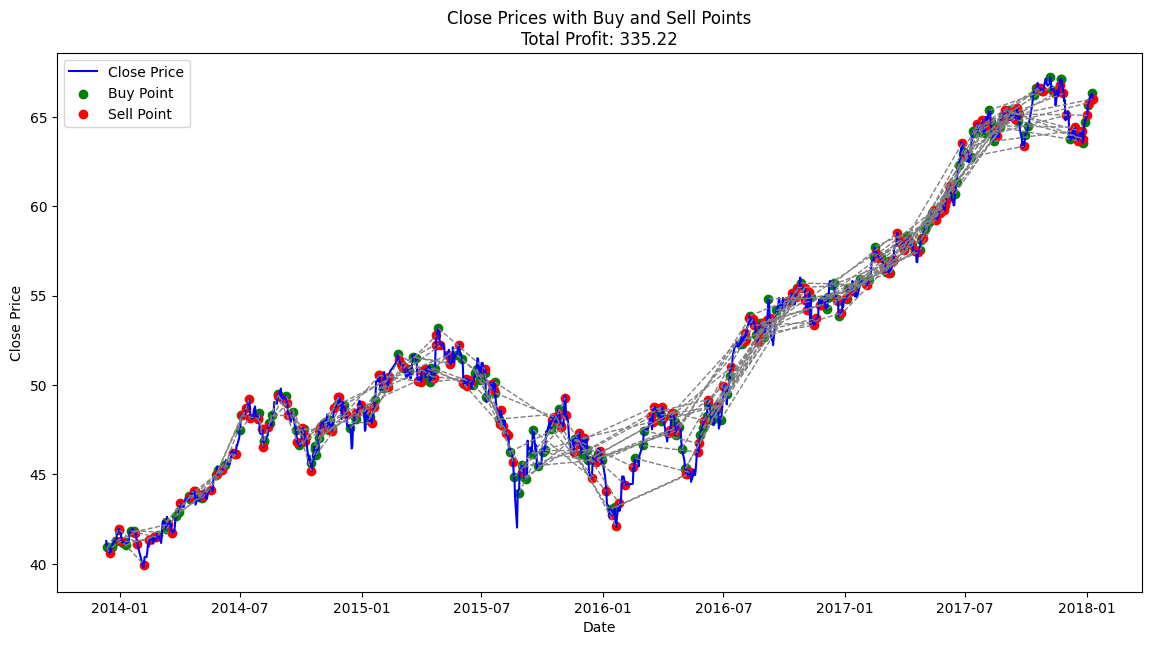

In [61]:
CNN_model(train_df,['Open', 'High', 'Low', 'Close', 'Volume_Thousand_Shares',
       'Turnover_Thousand', 'Number_of_Trades', 'Market_Value_Million', 'MACD',
       'DIF', 'MACD_hist', 'RSI', 'Upper_Band', 'Middle_Band', 'Lower_Band',
       'SMA', 'EMA'])

## LSTM less features

Epoch 1/100


<ipython-input-62-c22e0428f8e7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-62-c22e0428f8e7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(float)  # Convert to numeric if possible
<ipython-input-62-c22e0428f8e7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

126/126 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.4036 - loss: 1.0914 - val_accuracy: 0.5289 - val_loss: 1.0705
Epoch 2/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4976 - loss: 1.0578 - val_accuracy: 0.5219 - val_loss: 0.9892
Epoch 3/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5300 - loss: 0.9623 - val_accuracy: 0.5667 - val_loss: 0.8825
Epoch 4/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5708 - loss: 0.8820 - val_accuracy: 0.6215 - val_loss: 0.8591
Epoch 5/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5875 - loss: 0.8653 - val_accuracy: 0.6295 - val_loss: 0.8460
Epoch 6/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6181 - loss: 0.8384 - val_accuracy: 0.6484 - val_loss: 0.8295
Epoch 7/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6296 - loss: 0.8286 - val_accuracy: 0.6484 - val_loss: 0.8282
Epoch 8/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6268 - loss: 0.8180 - val_accuracy

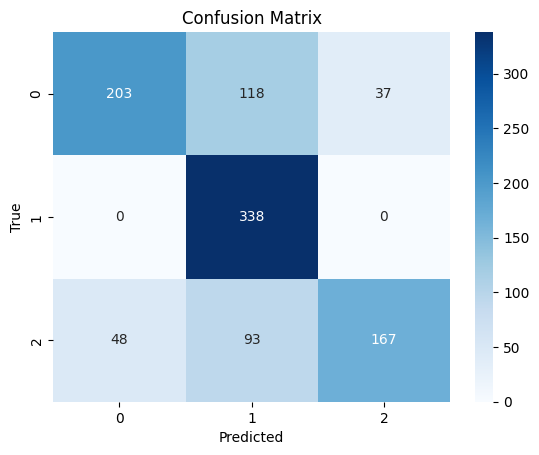

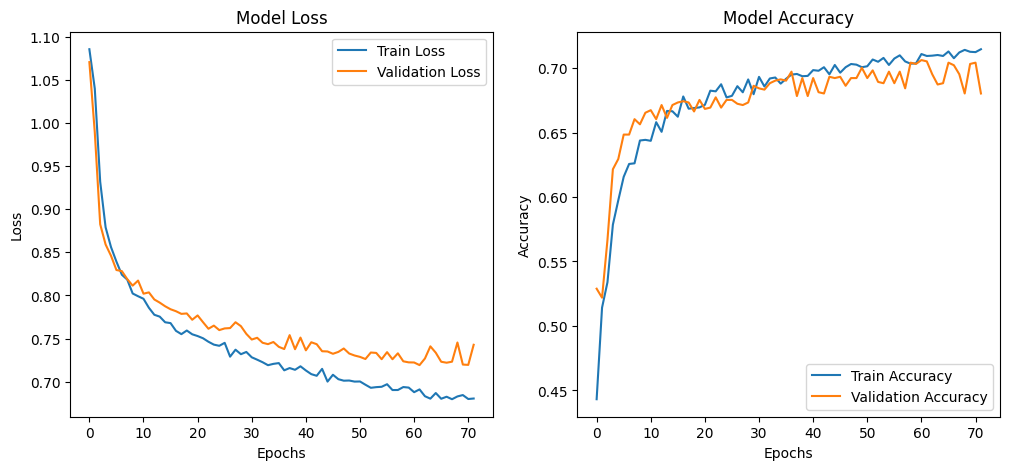

<ipython-input-22-51828c325972>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['True_Label'] = y_true
<ipython-input-22-51828c325972>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Label'] = y_pred


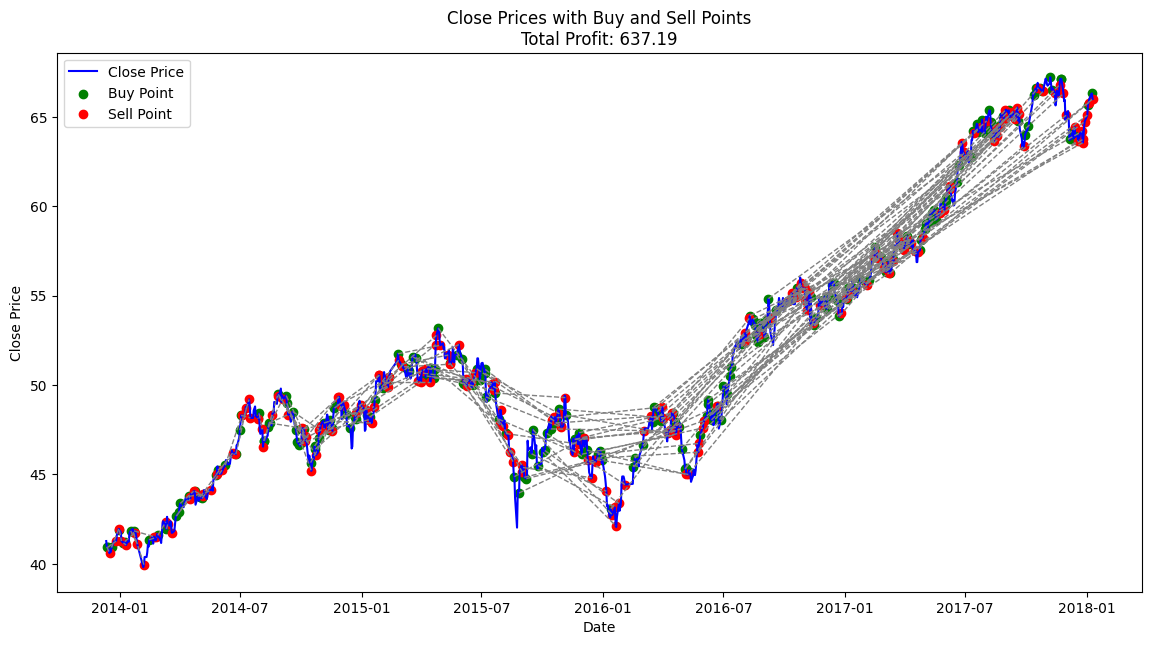

In [64]:
LSTM_model(train_df)

## LSTM more features

Epoch 1/100


<ipython-input-62-c22e0428f8e7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-62-c22e0428f8e7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(float)  # Convert to numeric if possible
<ipython-input-62-c22e0428f8e7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

126/126 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.3765 - loss: 1.0965 - val_accuracy: 0.5080 - val_loss: 1.0799
Epoch 2/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4807 - loss: 1.0765 - val_accuracy: 0.5269 - val_loss: 1.0303
Epoch 3/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5199 - loss: 1.0127 - val_accuracy: 0.5388 - val_loss: 0.9382
Epoch 4/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5474 - loss: 0.9174 - val_accuracy: 0.6195 - val_loss: 0.8788
Epoch 5/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5646 - loss: 0.8832 - val_accuracy: 0.6325 - val_loss: 0.8535
Epoch 6/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6090 - loss: 0.8611 - val_accuracy: 0.6424 - val_loss: 0.8334
Epoch 7/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6039 - loss: 0.8392 - val_accuracy: 0.6524 - val_loss: 0.8268
Epoch 8/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6393 - loss: 0.8076 - val_accuracy

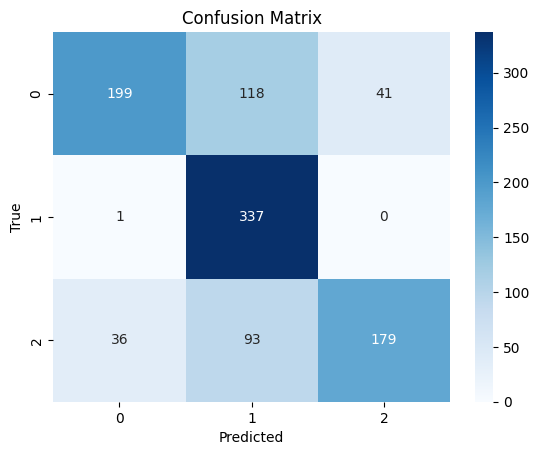

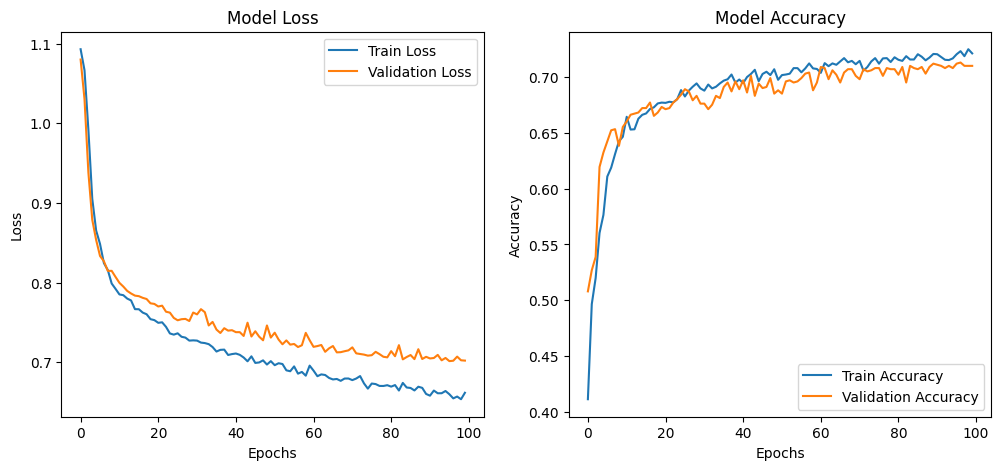

<ipython-input-22-51828c325972>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['True_Label'] = y_true
<ipython-input-22-51828c325972>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Label'] = y_pred


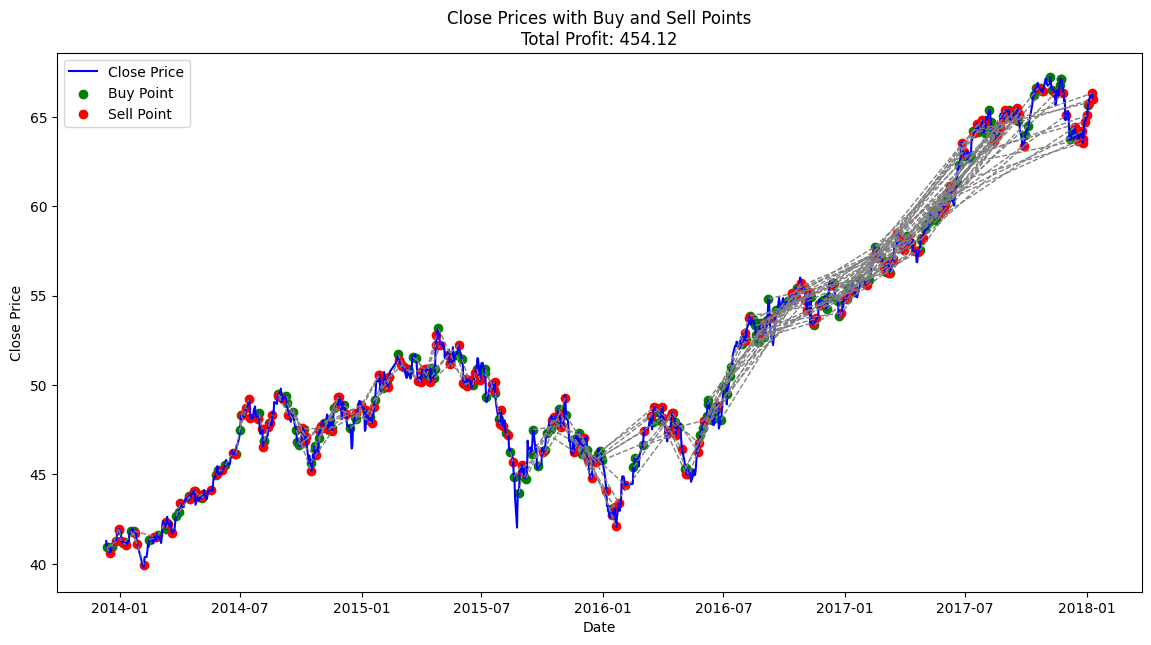

In [63]:
LSTM_model(train_df,['Open', 'High', 'Low', 'Close', 'Volume_Thousand_Shares',
       'Turnover_Thousand', 'Number_of_Trades', 'Market_Value_Million', 'MACD',
       'DIF', 'MACD_hist', 'RSI', 'Upper_Band', 'Middle_Band', 'Lower_Band',
       'SMA', 'EMA'])

## Function：CNN-LSTM_model

In [23]:
from tensorflow.keras.layers import LSTM, Dropout, Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.preprocessing import StandardScaler
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def CNN_LSTM_model(train_df, features=['Open', 'High', 'Low', 'Close', 'Volume_Thousand_Shares', 'Number_of_Trades', 'Market_Value_Million']):
    X = train_df[features]
    y = train_df['Label']

    # 處理NaN和無限大數據
    X.replace([np.inf, -np.inf], np.nan, inplace=True)

    # 移除逗號並將數據轉換為float型
    for col in features:
        if X[col].dtype == object:
            X[col] = X[col].str.replace(',', '', regex=False).astype(float)
        else:
            X[col] = X[col].astype(float)

    X.fillna(X.median(), inplace=True)

    # 轉換為numpy陣列
    X = X.values
    y = y.values

    # 使用RandomOverSampler處理不平衡資料
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)

    # 標準化資料
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_resampled)

    # 建立時間序列數據
    window_size = 9
    num_features = len(features)

    def create_sequences(data, labels, window_size):
        X_seq, y_seq = [], []
        for i in range(len(data) - window_size):
            X_seq.append(data[i:i + window_size])
            y_seq.append(labels[i + window_size])
        return np.array(X_seq), np.array(y_seq)

    X_seq, y_seq = create_sequences(X_scaled, y_resampled, window_size)

    # 分割訓練和測試數據
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

    # 建立CNN-LSTM模型
    model = Sequential()

    # CNN部分
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, num_features)))
    model.add(MaxPooling1D(pool_size=2))

    # LSTM部分
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))

    # 全連接層
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))  # 3個類別：買點，持有，賣點

    # 編譯模型
    optimizer = Adam(learning_rate=0.0001, clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # 使用Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # 評估模型
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {test_acc:.2f}")

    # 預測測試集
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # 計算均方誤差
    mse = mean_squared_error(y_test, y_pred)
    print(f"Test MSE: {mse:.2f}")

    # 混淆矩陣
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # 繪製精確度變化圖
    accuracy_plot(history)

    # 繪製買賣點及收益圖
    plot_buy_sell_points_with_profit(train_df, y_test, y_pred)



In [20]:
train_df=df

<ipython-input-23-ff90d1ebc01f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-23-ff90d1ebc01f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(float)
<ipython-input-23-ff90d1ebc01f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch 1/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3333 - loss: 1.0901 - val_accuracy: 0.4211 - val_loss: 1.0477
Epoch 2/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4682 - loss: 1.0305 - val_accuracy: 0.5375 - val_loss: 0.9573
Epoch 3/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5552 - loss: 0.9342 - val_accuracy: 0.5444 - val_loss: 0.8824
Epoch 4/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5523 - loss: 0.8867 - val_accuracy: 0.5572 - val_loss: 0.8524
Epoch 5/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5685 - loss: 0.8580 - val_accuracy: 0.5937 - val_loss: 0.8370
Epoch 6/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5674 - loss: 0.8538 - val_accuracy: 0.5720 - val_loss: 0.8313
Epoch 7/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5882 - loss: 0.8347 - val_accuracy: 0.6193 - val_loss: 0.8229
Epoch 8/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5891 - loss: 0.8332 - val_accu

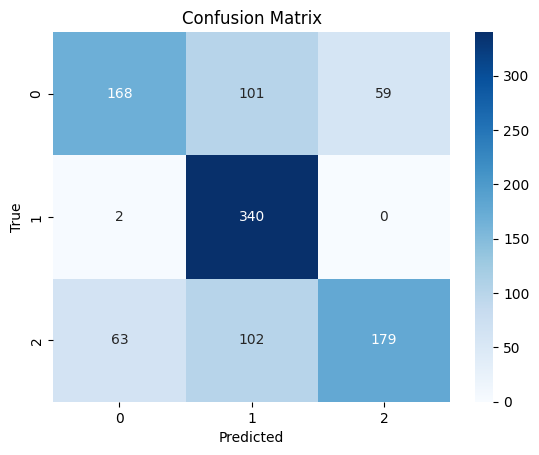

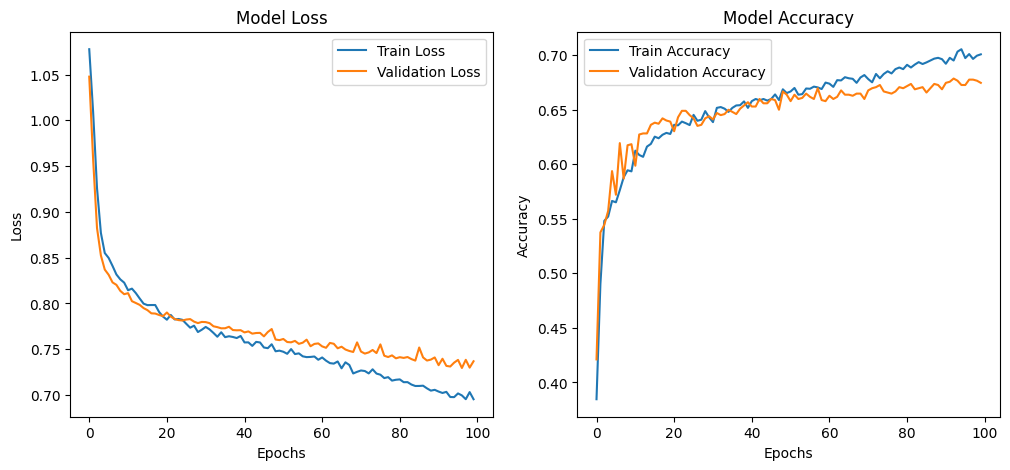

<ipython-input-16-51828c325972>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['True_Label'] = y_true
<ipython-input-16-51828c325972>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Label'] = y_pred


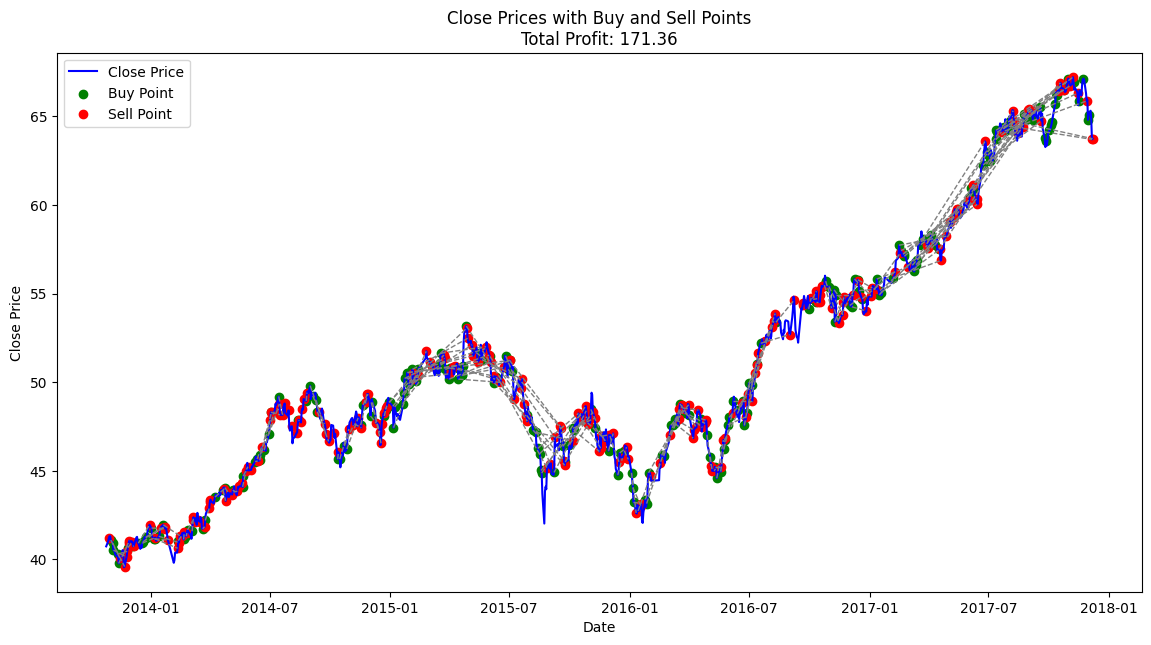

In [24]:
CNN_LSTM_model(train_df,['Open', 'High', 'Low', 'Close', 'Volume_Thousand_Shares', 'Number_of_Trades', 'Market_Value_Million'])

## CNN-LSTM more features

<ipython-input-23-ff90d1ebc01f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-23-ff90d1ebc01f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(float)
<ipython-input-23-ff90d1ebc01f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch 1/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4268 - loss: 1.0741 - val_accuracy: 0.6085 - val_loss: 0.9847
Epoch 2/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6032 - loss: 0.9598 - val_accuracy: 0.6696 - val_loss: 0.8604
Epoch 3/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6561 - loss: 0.8415 - val_accuracy: 0.6884 - val_loss: 0.7736
Epoch 4/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6862 - loss: 0.7583 - val_accuracy: 0.7179 - val_loss: 0.7259
Epoch 5/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7056 - loss: 0.7139 - val_accuracy: 0.7268 - val_loss: 0.6911
Epoch 6/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7255 - loss: 0.6784 - val_accuracy: 0.7318 - val_loss: 0.6722
Epoch 7/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7362 - loss: 0.6566 - val_accuracy: 0.7357 - val_loss: 0.6587
Epoch 8/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7399 - loss: 0.6449 - val_accu

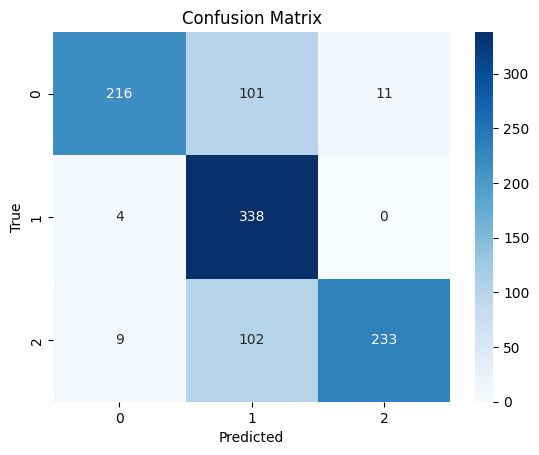

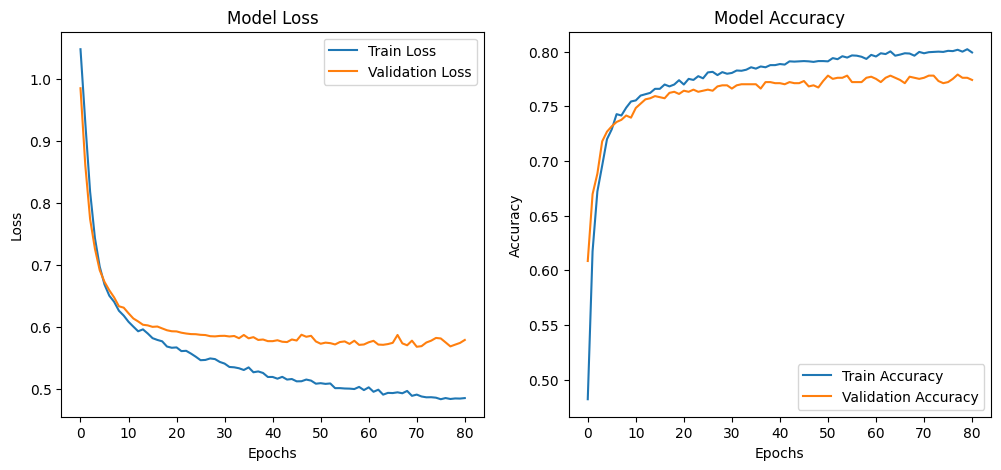

<ipython-input-16-51828c325972>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['True_Label'] = y_true
<ipython-input-16-51828c325972>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Label'] = y_pred


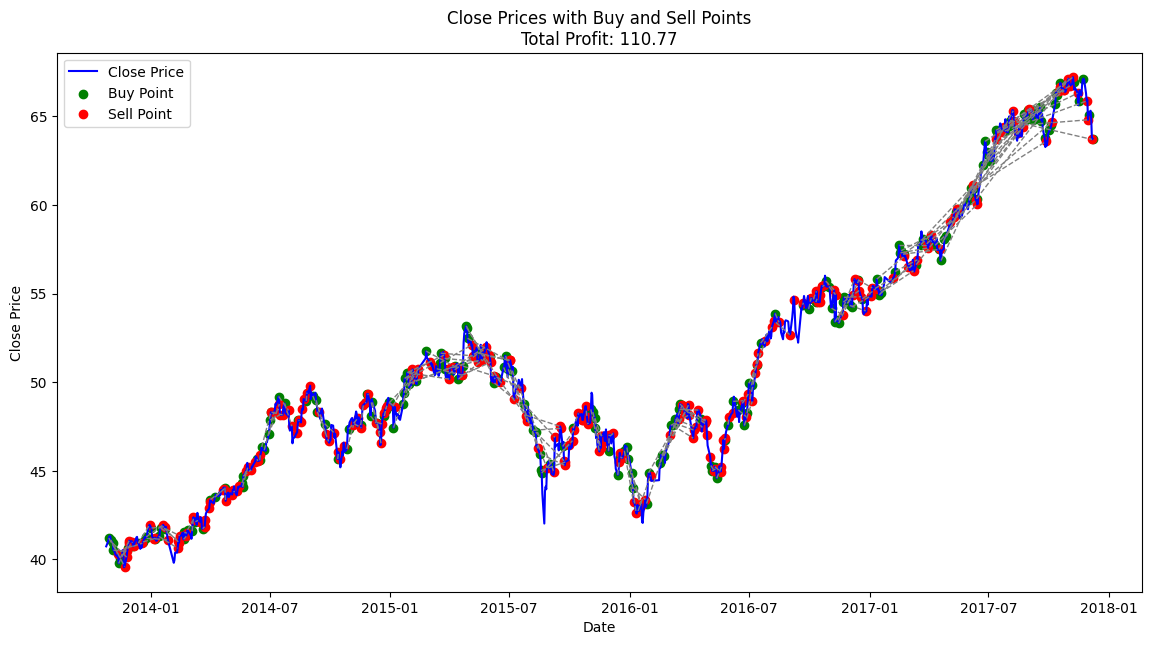

In [25]:
CNN_LSTM_model(train_df,['Open', 'High', 'Low', 'Close', 'Volume_Thousand_Shares',
       'Turnover_Thousand', 'Number_of_Trades', 'Market_Value_Million', 'MACD',
       'DIF', 'MACD_hist', 'RSI', 'Upper_Band', 'Middle_Band', 'Lower_Band',
       'SMA', 'EMA'])

##to do list
* 加入更多feature
* 加入成交量 ✅
* 確認feature正確性

## 查看李宏毅CNN、LSTM
* https://www.youtube.com/watch?v=OP5HcXJg2Aw
* https://www.youtube.com/watch?v=xCGidAeyS4M&t=1048s
* https://www.youtube.com/watch?v=rTqmWlnwz_0